<a href="https://colab.research.google.com/github/Priyo-prog/Deep-Learning-with-Tensorflow/blob/main/Neural%20Network%20Classification%20with%20Tensorflow/Neural_Network_Classification_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Session 1

## Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Create the dataset

In [2]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [3]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check out the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

## Visualize the data

In [5]:
# Create the dataframe for the data

circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "labels":y})
circles

,X0,X1,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


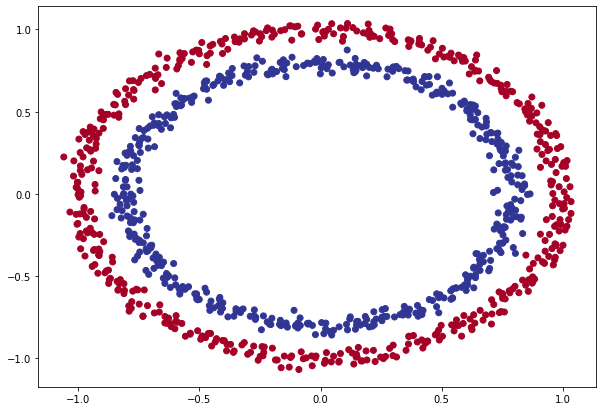

In [6]:
# Visualize the data with a plot
plt.figure(figsize=(10,7))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes


In [7]:
X.shape, y.shape, X.ndim, y.ndim

((1000, 2), (1000,), 2, 1)

In [8]:
# How many samples we are working
len(X), len(y)

(1000, 1000)

In [9]:
# Check out the first sample of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Split the data into train and test split

In [10]:
X_train,y_train = X[:800], y[:800]

X_test, y_test = X[800:], y[800:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

## Build the model

In [11]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
 tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
 tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
 tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# 3. Fit the model
history = model.fit(X_train, y_train, epochs=100, verbose=0)

# 4. Evaluate the model
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.5627 - accuracy: 0.7450


[0.5626760721206665, 0.7450000047683716]

## Plot decision boundary

Doing binary classification


(-1.1677683182718437, 1.1360036756154805)

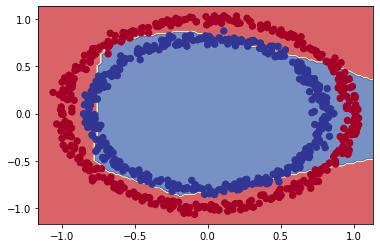

In [12]:
"""
Plot a decision boundary created by a model predicting on X
"""

# Define the axis boundaries of the plot and create a meshgrid
x_min, x_max = X_train[:,0].min() - 0.1, X_train[:,0].max() + 0.1
y_min, y_max = X_train[:,1].min() - 0.1, X_train[:,1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max,100),
                     np.linspace(y_min,y_max,100))

# Create X values (we are going to predict on these)
x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

# Make predictions
y_pred = model.predict(x_in)

# Check for multiclass-classification
if len(y_pred[0]) > 1:
  print("Doing multi-class classification")
  # We have to reshape our prediction to get them ready for plotting
  y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
else:
  print("Doing binary classification")
  y_pred = np.round(y_pred).reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu, alpha=0.7)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=40, cmap=plt.cm.RdYlBu)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

## Experiments on Non-Linear activation functions

In [13]:
# Create a toy tensor
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

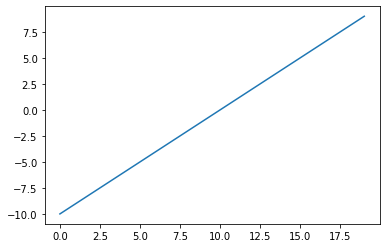

In [14]:
# Visualize our toy tensor
plt.plot(A)

In [15]:
# Create a custom sigmoid function
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

sigmoid(A)  

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

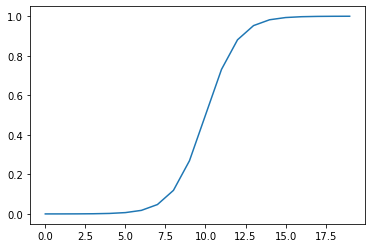

In [16]:
# Plot our toy tensor transformed by our custom sigmoid
plt.plot(sigmoid(A))

In [17]:
# Create a custom relu function
def relu(x):
  return tf.maximum(0,x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

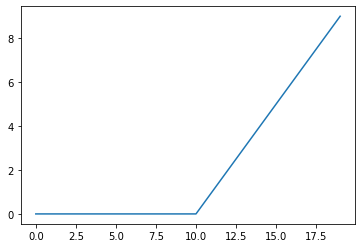

In [18]:
# Plot the tensor modified by ReLU function
plt.plot(relu(A))

## Create the model with higher learning rate

In [19]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
 tf.keras.layers.Dense(4, activation="relu"),
 tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
 tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)                               
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Create a learning rate callback(This can be called during model training)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4 * 10**(epoch/20))

# 4. Fit the model
history = model_1.fit(X_train, y_train, epochs=100, verbose=0,
            callbacks=[lr_scheduler])

# 5. Evaluate the model
model_1.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4950


[0.6933157444000244, 0.4950000047683716]

## Plot the history loss curve of the model

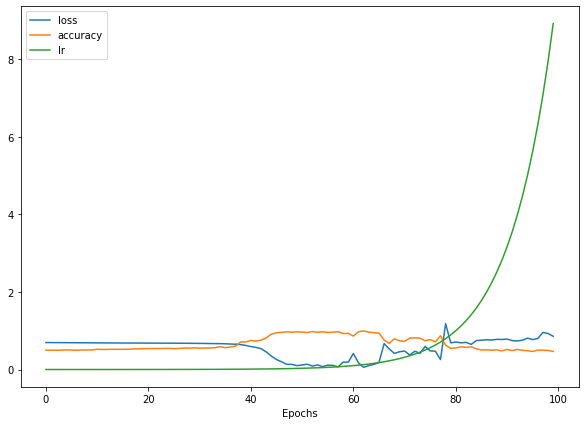

In [20]:
# Check out the history the loss curve of the model
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="Epochs")

## Plot the learning rate versus the loss

Text(0.5, 1.0, 'Learning Rate Vs Loss')

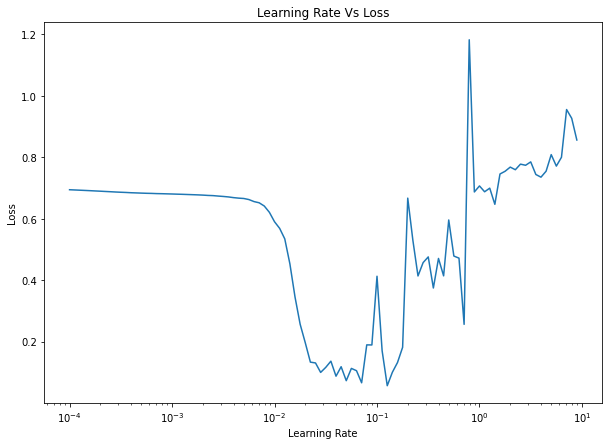

In [21]:
lrs = 1e-4 * (10**(tf.range(100) / 20))

plt.figure(figsize=(10,7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate Vs Loss")

## Plot the decision boundary once again

Doing binary class classification
Doing binary classification


(-1.1451060703147307, 1.1223431401298687)

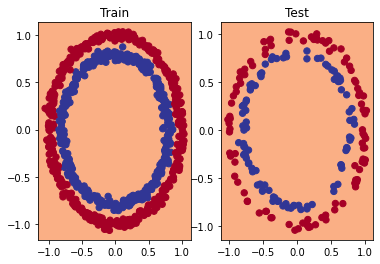

In [22]:
# Plot the decision boundary for both train and test data

"""
Plot a decision boundary created by a model predicting on X
"""
# Create the mesh boundaries of the plot and a meshgrid
"""
Meshgrid - 
 Return coordinate matrices from coordinate vectors.
 Make N-D coordinate arrays for vectorized evaluations of N-D scalar/vector
 fields over N-D grids, given one-dimensional coordinate arrays x1, x2,…, xn.
"""
x_min, x_max = X_train[:,0].min() - 0.1, X_train[:,0].max() + 0.1
y_min, y_max = X_train[:,1].min() - 0.1, X_train[:,1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max,100),
                     np.linspace(y_min,y_max,100))

# Create X values (we are going to predict on these values)
x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

# Make predictions
y_pred = model_1.predict(x_in)

# Check for multi-class classification
if len(y_pred[0]) > 1:
  print("Doing multi-class classifications")
  # We have to reshape our prediction to get them ready for plotting
  y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
else:
  print("Doing binary class classification")
  y_pred = np.round(y_pred).reshape(xx.shape)

# Plot the decision boundary
plt.subplot(1,2,1)
plt.title("Train")
plt.contourf(xx,yy,y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=40, cmap=plt.cm.RdYlBu)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

"""
Plot a decision boundary for X_test
"""
x_min1, x_max1 = X_test[:,0].min() - 0.1, X_test[:,0].max() + 0.1
y_min1, y_max1 = X_test[:,1].min() - 0.1, X_test[:,1].max() + 0.1

xx1, yy1 = np.meshgrid(np.linspace(x_min1,x_max1,100),
                       np.linspace(y_min1,y_max1,100))

# Create X values
x_in1 = np.c_[xx1.ravel(), yy1.ravel()]

# Make prediction
y_pred1 = model_1.predict(x_in1)

# Check for the multi-class classification
if len(y_pred1[0]) > 1:
  print("Doing multi-class classification")
  y_pred1 = np.argmax(y_pred1, axis=1).reshape(xx1.shape)
else:
  print("Doing binary classification")
  y_pred1 = np.round(y_pred1).reshape(xx1.shape)

# Plot the decision boundary
plt.subplot(1,2,2)
plt.title("Test")
plt.contourf(xx1,yy1,y_pred1, cmap=plt.cm.RdYlBu, alpha=0.7)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, s=40, cmap=plt.cm.RdYlBu)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(yy1.min(), yy1.max())

## Building the confusion matrix

In [23]:
from sklearn.metrics import confusion_matrix

y_preds = model_1.predict(X_test)

confusion_matrix(y_test, tf.round(y_preds))

array([[  0, 101],
       [  0,  99]])

## Plot the confusion matrix

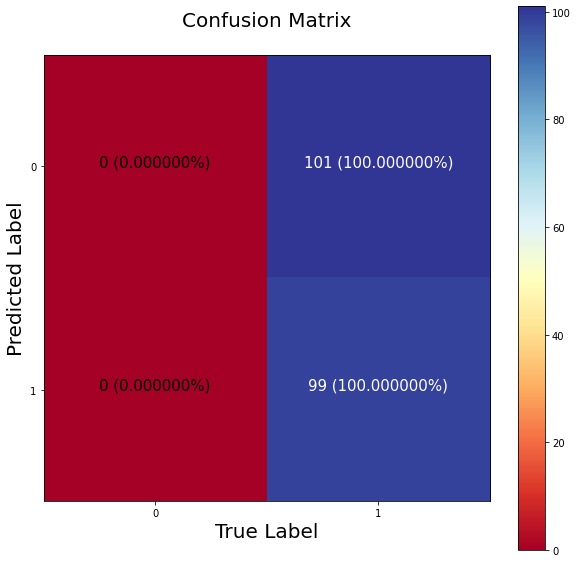

In [24]:
import itertools

figsize = (10,10)

# Create the confusion matrix
cm = confusion_matrix(y_test,tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]
n_classes = cm.shape[0]

# Let's prettify it
fig,ax = plt.subplots(figsize=figsize)

# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.RdYlBu)
fig.colorbar(cax)

# Create classes (if we have multi-class we take different step)
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="True Label",
       ylabel="Predicted Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)    

# Set x-labels to the bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust the label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2

# Plot the text on each cells
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, f"{cm[i,j]} ({cm_norm[i,j] * 100:1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j] > threshold else "black",
           size=15)

# Practice Session 2

## Import packages

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Create dataset

In [26]:
from sklearn.datasets import make_circles

n_samples = 2000

X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [27]:
X[:10]

array([[ 0.47109875, -0.58158579],
       [-0.61696058,  0.80818956],
       [-0.3999557 ,  0.70796779],
       [ 0.82938523, -0.60057314],
       [-0.16419138,  0.76128858],
       [-0.16190608,  0.77881744],
       [ 0.9701    , -0.35427244],
       [-0.10573729, -0.80478381],
       [ 0.90810557,  0.45945033],
       [-0.34274852,  0.73021408]])

In [28]:
y[:10]

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 1])

## Visualize the data

In [29]:
# Create dataframe for the data

circles = pd.DataFrame({"X0":X[:,0], "X2":X[:,1], "labels":y})
circles

,X0,X2,labels
0,0.471099,-0.581586,1
1,-0.616961,0.808190,0
2,-0.399956,0.707968,1
3,0.829385,-0.600573,0
4,-0.164191,0.761289,1
...,...,...,...
1995,0.568918,0.583759,1
1996,-0.222517,0.756905,1
1997,0.628268,-0.739106,0
1998,-0.783659,0.163585,1


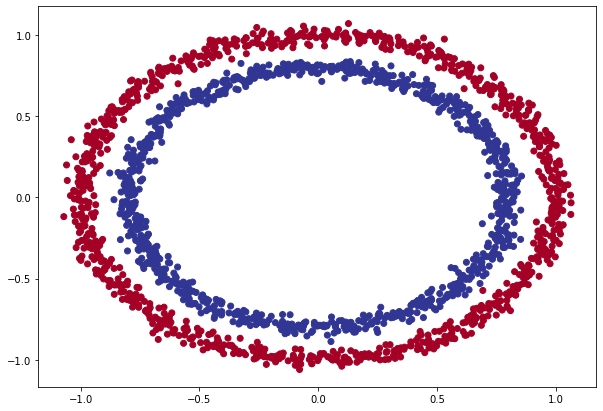

In [30]:
# Visualize the data with a plot
plt.figure(figsize=(10,7))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

## Input and Output shapes

In [31]:
X.shape, y.shape, X.ndim, y.ndim

((2000, 2), (2000,), 2, 1)

In [32]:
# Check out the first samples of features and labels
X[0], y[0]

(array([ 0.47109875, -0.58158579]), 1)

## Split the data in Training and Testing sets

In [33]:
X_train, y_train = X[:1600], y[:1600]
X_test, y_test = X[800:], y[800:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1600, 2), (1600,), (1200, 2), (1200,))

## Create the model with higher learning rate

In [34]:
# Set some random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
 tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
 tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
 tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Create the learning rate callback (This can be called during model training)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 4. Fit the model
history_1 = model_2.fit(X_train, y_train, epochs=100,
                        verbose=0, callbacks=[lr_scheduler])

# Evaluate the model
model_2.evaluate(X_test, y_test)

38/38 [==============================] - 0s 1ms/step - loss: 1.0554 - accuracy: 0.5025


[1.0554276704788208, 0.5024999976158142]

## Plot the history loss curve of the model

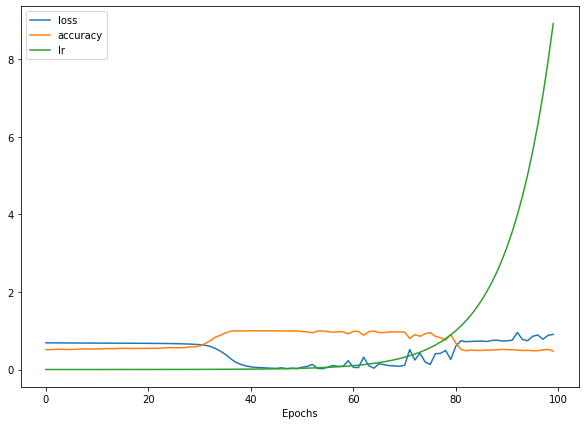

In [35]:
pd.DataFrame(history_1.history).plot(figsize=(10,7), xlabel="Epochs")

## Plot the learning rate versus the loss

Text(0.5, 1.0, 'Learning Rate Vs Loss')

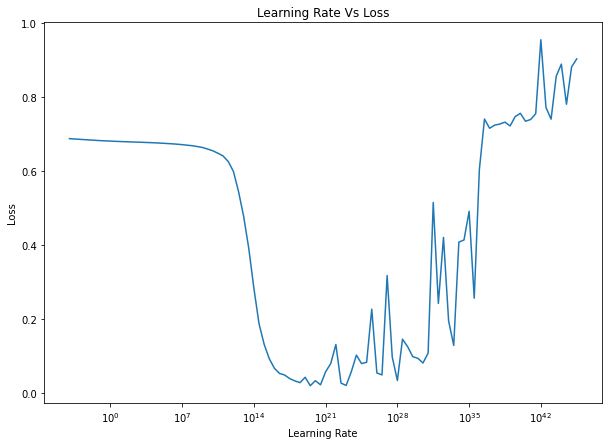

In [36]:
lrs = 1e-4 * (10**(tf.range(100) / 2))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_1.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate Vs Loss")

## Plot the decision boundary

In [43]:
def plot_decision_boundary(model,X,y):
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max,100),
                       np.linspace(y_min, y_max,100))

  # Create X values (we're going to predict on all these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for the multi-class
  if len(y_pred[0]) > 1:
    print("doing multi-class classification...")
    # We've to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification...")  
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx,yy,y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max()) 

doing binary classification...


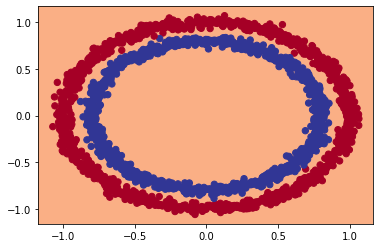

In [44]:
# Check out the predictions our model is making
plot_decision_boundary(model_2, X=X,y=y)

## Plot the decision boundary for both Train and Test set


doing binary classification...
doing binary classification...


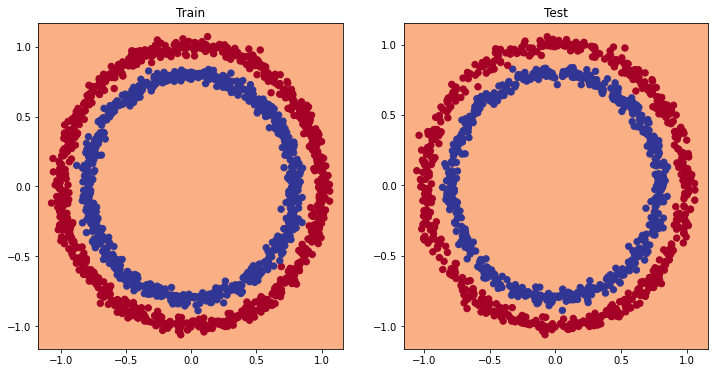

In [45]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_2, X=X_train, y=y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_2, X=X_test, y=y_test)
plt.show()

## Check the accuracy of the model

In [47]:
loss, accuracy = model_2.evaluate(X_test, y_test)

print(f"Model loss on Test set: {loss}")
print(f"Model accuracy on Test set : {(accuracy * 100):.2f}%")

38/38 [==============================] - 0s 1ms/step - loss: 1.0554 - accuracy: 0.5025
Model loss on Test set: 1.0554276704788208
Model accuracy on Test set : 50.25%
